In [1]:
#pip install tensorflow==2.12.0 --upgrade

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import matplotlib as mpl

In [4]:
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
%matplotlib inline 

In [7]:
(X_train_full , y_train_full), (X_test , y_test)   = fashion_mnist.load_data()

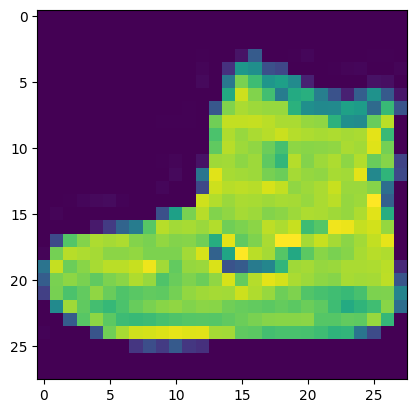

In [8]:
plt.imshow(X_train_full[0])

In [9]:
y_train_full[0]

9

In [10]:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress", "Coat", "Sandal", "Shirt","Sneaker","Bag","Ankle Boot"]

In [11]:
class_names[y_train_full[1]]

'T-shirt/Top'

In [12]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

In [13]:
X_valid , X_train = X_train_n[:5000], X_train_n[5000:] 
y_valid , y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [101]:
#pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [106]:
import pydot


In [16]:
weights, biases = model.layers[1].get_weights()

In [17]:
weights

array([[ 0.01004207, -0.02955132, -0.04155891, ..., -0.03552275,
        -0.06295411, -0.05464595],
       [-0.05899736, -0.0559682 ,  0.06087756, ..., -0.03794239,
        -0.04911741, -0.00568418],
       [ 0.05791849,  0.0296288 , -0.05151992, ...,  0.03046274,
         0.05733484, -0.05807861],
       ...,
       [ 0.03500964, -0.04679099,  0.00211377, ..., -0.06895344,
        -0.03066666, -0.0561995 ],
       [ 0.01142491, -0.00416224,  0.00089539, ..., -0.01831435,
         0.03627507, -0.02829533],
       [ 0.01150238, -0.0551993 , -0.05280045, ..., -0.05227919,
         0.00330494,  0.03156405]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
#Compile the model

In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [22]:
X_train.shape

(55000, 28, 28)

In [23]:
y_train.shape

(55000,)

In [24]:
X_valid.shape

(5000, 28, 28)

In [25]:
y_valid.shape

(5000,)

In [26]:
# Model fit can be run multiple times to immprove the accuracy of the model as the model continues to learn from where it left off from previous 
# run and improve accuracy of the model


In [27]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7190 - accuracy: 0.7623 - val_loss: 0.5589 - val_accuracy: 0.7998
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4865 - accuracy: 0.8299 - val_loss: 0.4670 - val_accuracy: 0.8330
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4409 - accuracy: 0.8447 - val_loss: 0.4273 - val_accuracy: 0.8540
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4139 - accuracy: 0.8544 - val_loss: 0.4091 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3935 - accuracy: 0.8604 - val_loss: 0.3834 - val_accuracy: 0.8720
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3762 - accuracy: 0.8673 - val_loss: 0.3697 - val_accuracy: 0.8736
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3635 - accuracy: 0.8703 - val_loss: 0.3636 - val_accuracy:

In [28]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [29]:
model_history.history

{'loss': [0.7189716100692749,
  0.4865092933177948,
  0.44094815850257874,
  0.4138614237308502,
  0.3934747874736786,
  0.3761622905731201,
  0.36345401406288147,
  0.3523534834384918,
  0.3418795168399811,
  0.33155357837677,
  0.32374265789985657,
  0.3159792125225067,
  0.30960628390312195,
  0.30199337005615234,
  0.29543256759643555,
  0.2904110252857208,
  0.2837796211242676,
  0.2781903147697449,
  0.27345630526542664,
  0.26859214901924133,
  0.26375752687454224,
  0.2596869170665741,
  0.25459662079811096,
  0.25079345703125,
  0.2459450215101242,
  0.2411642074584961,
  0.23790422081947327,
  0.23286637663841248,
  0.22956275939941406,
  0.22612789273262024],
 'accuracy': [0.7622727155685425,
  0.829909086227417,
  0.8447272777557373,
  0.8543999791145325,
  0.8604182004928589,
  0.8673090934753418,
  0.8703454732894897,
  0.8751636147499084,
  0.8787636160850525,
  0.8812727332115173,
  0.8837636113166809,
  0.8874363899230957,
  0.8896363377571106,
  0.8915272951126099,
  

In [30]:
import pandas as pd

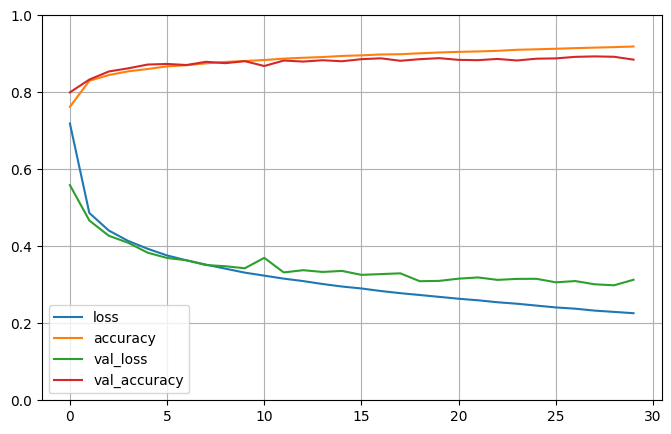

In [31]:
# Model accuracy plot for first run of  model fit
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [133]:
# Refit the modelo

In [32]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2228 - accuracy: 0.9201 - val_loss: 0.2938 - val_accuracy: 0.8974
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2187 - accuracy: 0.9213 - val_loss: 0.2980 - val_accuracy: 0.8952
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2157 - accuracy: 0.9231 - val_loss: 0.2889 - val_accuracy: 0.8922
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2114 - accuracy: 0.9244 - val_loss: 0.3057 - val_accuracy: 0.8898
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2093 - accuracy: 0.9247 - val_loss: 0.2899 - val_accuracy: 0.8960
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2050 - accuracy: 0.9268 - val_loss: 0.3090 - val_accuracy: 0.8876
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2020 - accuracy: 0.9290 - val_loss: 0.3152 - val_accuracy:

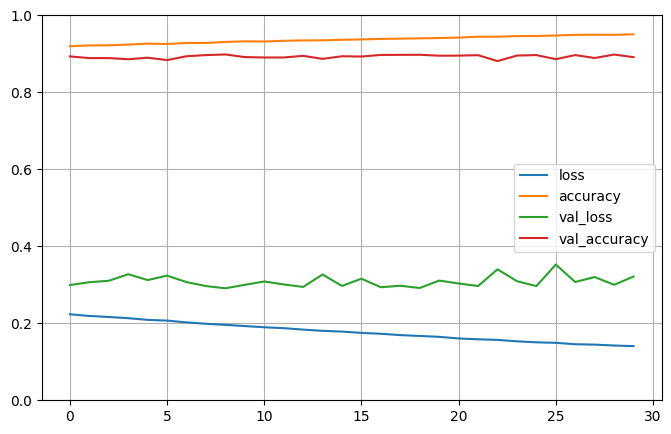

In [124]:
# Model accuracy plot for second run of  model fit
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [54]:
# Predicting the values using the model and evaluate performance

In [56]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3346 - accuracy: 0.8892


[0.3345540761947632, 0.88919997215271]

In [57]:
X_new = X_test[:3]

In [58]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 141ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [72]:
predict_x=model.predict(X_new) 
classes_x=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 111ms/step


In [73]:
classes_x

array([9, 2, 1], dtype=int64)

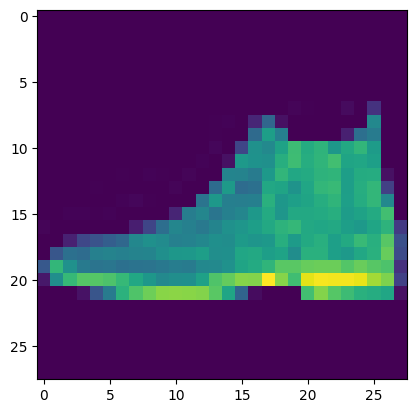

In [59]:
plt.imshow(X_test[0])

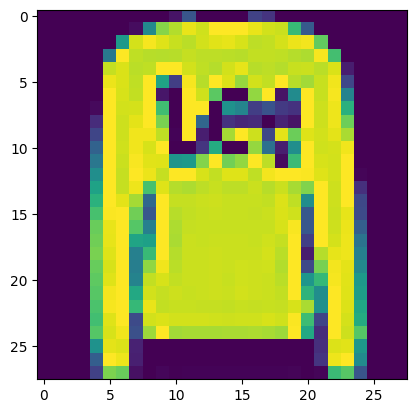

In [60]:
plt.imshow(X_test[1])

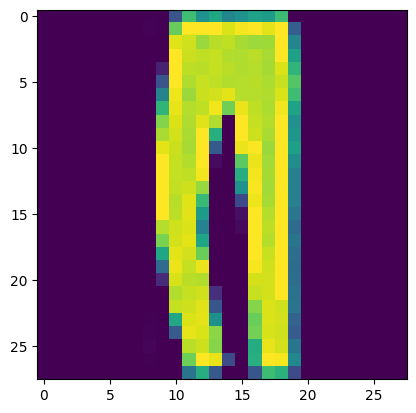

In [61]:
plt.imshow(X_test[2])

In [63]:
import numpy as np
class_names[np.argmax(y_proba[0])]

'Ankle Boot'

In [65]:
class_names[np.argmax(y_proba[1])]

'Pullover'

In [66]:
class_names[np.argmax(y_proba[2])]

'Trouser'

In [ ]:
# Saving and Restoring models

In [74]:
%pwd

'D:\\Projects\\DeepLearning\\cnn_projects'

In [75]:
model.save("Image_classification.h5")

In [76]:
del model

In [77]:
keras.backend.clear_session()

In [78]:
model = keras.models.load_model("Image_classification.h5")

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [81]:
y_pred =  model.predict(X_new)
print(y_pred)

1/1 [==============================] - 0s 84ms/step
[[4.2458456e-08 1.2571324e-08 3.1765893e-07 2.0692175e-07 2.0001746e-08
  1.3378495e-04 2.1499332e-07 8.1458306e-03 9.3722492e-06 9.9171025e-01]
 [1.4129495e-05 3.3323652e-10 9.9966025e-01 3.9629369e-11 3.2494459e-04
  1.0061744e-10 6.6073818e-07 1.7274526e-11 1.2873862e-09 8.1188840e-14]
 [5.5203135e-08 9.9999988e-01 1.6219253e-11 4.3214285e-09 4.4942535e-08
  3.6789660e-14 2.4498075e-11 3.8753178e-11 5.9137787e-14 1.6444350e-14]]


In [83]:
classes_x=np.argmax(predict_x,axis=1)
classes_x

array([9, 2, 1], dtype=int64)

In [ ]:
# Creating a CNN model using Convolution layers


In [ ]:
# Data REshape

In [141]:
X_train_full = X_train_full.reshape((60000, 28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [142]:
X_train_n = X_train_full/255.
X_test_n = X_test/255.

In [143]:
X_valid , X_train = X_train_n[:5000], X_train_n[5000:] 
y_valid , y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [ ]:
# Define the CNN Model

In [146]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', activation='relu' , input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [147]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 300)               1622700   
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [149]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [150]:
model_history = model.fit(X_train, y_train, epochs=10, batch_size=64 , validation_data=(X_valid, y_valid))

Epoch 1/10
860/860 [==============================] - 31s 35ms/step - loss: 0.8460 - accuracy: 0.7206 - val_loss: 0.5457 - val_accuracy: 0.8108
Epoch 2/10
860/860 [==============================] - 30s 34ms/step - loss: 0.5265 - accuracy: 0.8099 - val_loss: 0.5460 - val_accuracy: 0.7896
Epoch 3/10
860/860 [==============================] - 30s 35ms/step - loss: 0.4734 - accuracy: 0.8300 - val_loss: 0.4801 - val_accuracy: 0.8330
Epoch 4/10
860/860 [==============================] - 30s 35ms/step - loss: 0.4340 - accuracy: 0.8446 - val_loss: 0.3984 - val_accuracy: 0.8596
Epoch 5/10
860/860 [==============================] - 31s 36ms/step - loss: 0.4109 - accuracy: 0.8540 - val_loss: 0.4053 - val_accuracy: 0.8532
Epoch 6/10
860/860 [==============================] - 31s 36ms/step - loss: 0.3874 - accuracy: 0.8613 - val_loss: 0.4020 - val_accuracy: 0.8548
Epoch 7/10
860/860 [==============================] - 31s 36ms/step - loss: 0.3688 - accuracy: 0.8684 - val_loss: 0.4453 - val_accuracy:

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [151]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 2s 8ms/step - loss: 2.7078 - accuracy: 0.1000


[2.70784854888916, 0.10000000149011612]

In [152]:
X_new = X_test[:3]

In [153]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 113ms/step


array([[0.28, 0.02, 0.1 , 0.08, 0.01, 0.17, 0.1 , 0.16, 0.05, 0.02],
       [0.29, 0.02, 0.11, 0.08, 0.01, 0.17, 0.11, 0.15, 0.05, 0.02],
       [0.29, 0.02, 0.1 , 0.08, 0.01, 0.17, 0.1 , 0.16, 0.05, 0.02]],
      dtype=float32)

In [154]:
predict_x=model.predict(X_new) 
classes_x=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 29ms/step


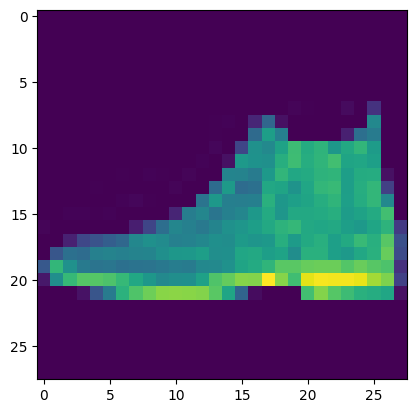

In [155]:
plt.imshow(X_test[0].reshape(28,28))

In [ ]:
# Impact of Pollong layer on performance and accuracy


In [ ]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', activation='relu' , input_shape=(28,28,1)))

model_a.add(keras.layers.Flatten(input_shape=[28,28]))
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model_a.summary()

In [ ]:
model_a.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
model_history_a = model_a.fit(X_train, y_train, epochs=10, batch_size=64 , validation_data=(X_valid, y_valid))

In [164]:
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', activation='relu' , input_shape=(28,28,1)))
model_b.add(keras.layers.MaxPooling2D((2,2)))

model_b.add(keras.layers.Flatten(input_shape=[28,28]))
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model_b.summary()

In [ ]:
model_b.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
model_history_b = model_b.fit(X_train, y_train, epochs=10, batch_size=64 , validation_data=(X_valid, y_valid))